In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [499]:
df = pd.read_csv('titanic.csv')

In [500]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [501]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [503]:
# Check the count of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [504]:
# Drop columns with too many missing values (if applicable)
df = df.drop(columns=['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [505]:
# Fill missing values in the 'Age' column with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [506]:
# Fill missing values in the 'Embarked' column with the most frequent value
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [507]:
# Extract the title from the 'Name' column and create a new 'Title' column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [508]:
# Map rare titles to 'Rare' category
rare_titles = ['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Jonkheer', 'Don', 'Sir', 'Lady', 'Countess', 'Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


In [509]:
# Convert 'Sex' to numeric (0 for female, 1 for male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [510]:
# Create a new 'FamilySize' column by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [511]:
# Create a new 'IsAlone' column based on family size
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [512]:
df = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'])

In [513]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,22.000000,7.2500,S,Mr,2,0
1,1,1,0,38.000000,71.2833,C,Mrs,2,0
2,1,3,0,26.000000,7.9250,S,Miss,1,1
3,1,1,0,35.000000,53.1000,S,Mrs,2,0
4,0,3,1,35.000000,8.0500,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,S,Rare,1,1
887,1,1,0,19.000000,30.0000,S,Miss,1,1
888,0,3,0,29.699118,23.4500,S,Miss,4,0
889,1,1,1,26.000000,30.0000,C,Mr,1,1


In [514]:
# If the dataset contains numerical features with different scales, consider scaling them
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [515]:
from sklearn.preprocessing import LabelEncoder
# Apply Label Encoding to 'Embarked' column
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Title'] = label_encoder.fit_transform(df['Title'])
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,-0.592481,-0.502445,2,4,2,0
1,1,1,0,0.638789,0.786845,0,5,2,0
2,1,3,0,-0.284663,-0.488854,2,1,1,1
3,1,1,0,0.407926,0.420730,2,5,2,0
4,0,3,1,0.407926,-0.486337,2,4,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,-0.386671,2,7,1,1
887,1,1,0,-0.823344,-0.044381,2,1,1,1
888,0,3,0,0.000000,-0.176263,2,1,4,0
889,1,1,1,-0.284663,-0.044381,0,4,1,1


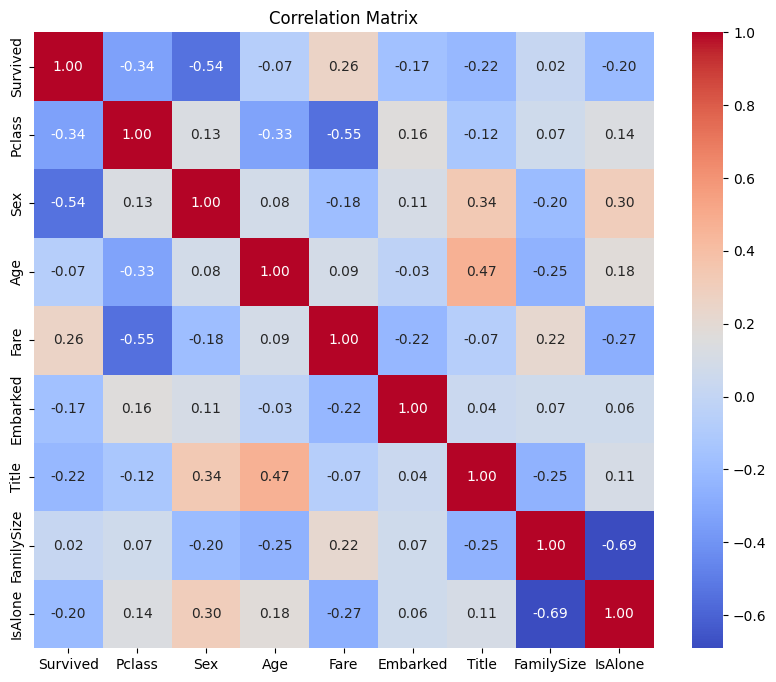

In [516]:
# Plotting a correlation matrix to visualize feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

c:\Users\achba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


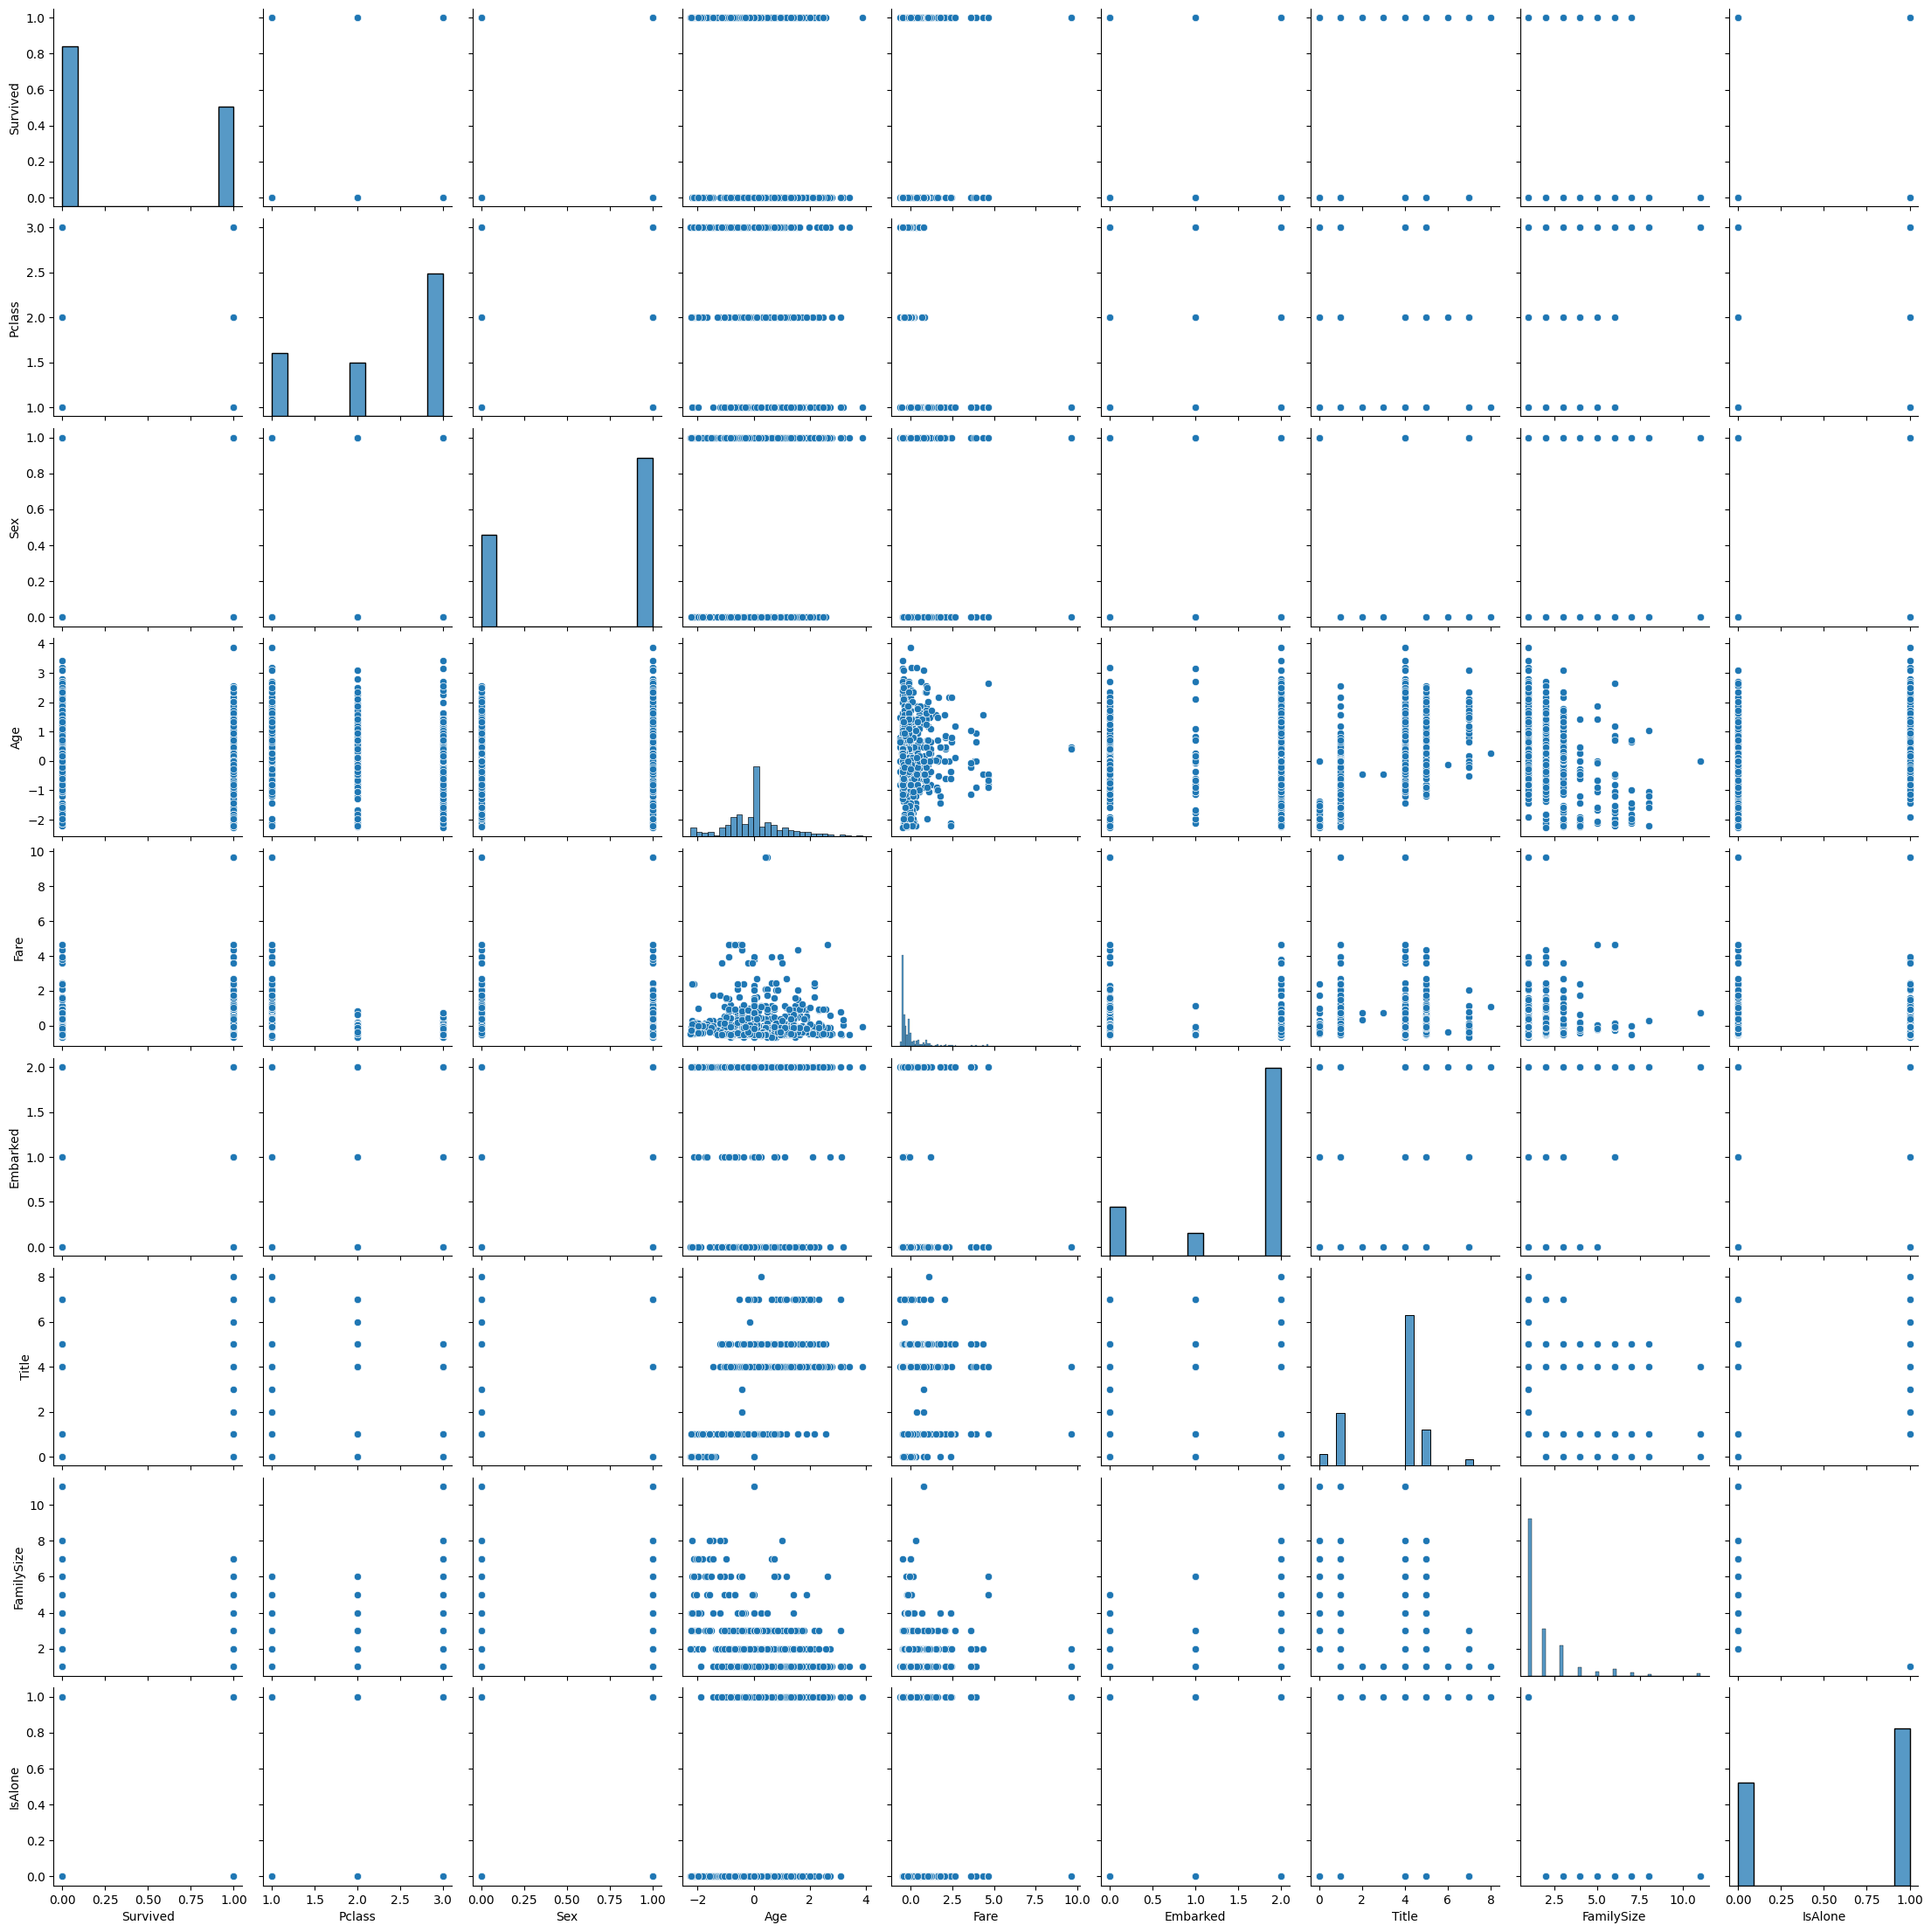

In [517]:
sns.pairplot(df)
plt.show()

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = df['Survived']  # Target variable

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the decision tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

NameError: name 'df' is not defined

In [12]:
import getpass
import oracledb

pw = getpass.getpass("Enter password: ")

connection = oracledb.connect(
    user="MAHDII",
    password="loloma123",
    dsn="localhost/orcl.Home")

print("Successfully connected to Oracle Database")

cursor = connection.cursor()

# Create a table

cursor.execute("""
    begin
        execute immediate 'drop table todoitem';
        exception when others then if sqlcode <> -942 then raise; end if;
    end;""")

cursor.execute("""
    create table todoitem (
        id number generated always as identity,
        description varchar2(4000),
        creation_ts timestamp with time zone default current_timestamp,
        done number(1,0),
        primary key (id))""")

# Insert some data

rows = [ ("Task 1", 0 ),
         ("Task 2", 0 ),
         ("Task 3", 1 ),
         ("Task 4", 0 ),
         ("Task 5", 1 ) ]

cursor.executemany("insert into todoitem (description, done) values(:1, :2)", rows)
print(cursor.rowcount, "Rows Inserted")

connection.commit()

# Now query the rows back
for row in cursor.execute('select description, done from todoitem'):
    if (row[1]):
        print(row[0], "is done")
    else:
        print(row[0], "is NOT done")

Successfully connected to Oracle Database
5 Rows Inserted
Task 1 is NOT done
Task 2 is NOT done
Task 3 is done
Task 4 is NOT done
Task 5 is done
